# 1/13  1. Введение

В этом модуле вы познакомитесь с инструментами, предназначенными для чтения данных, сохранённых в разных форматах, и научитесь записывать подготовленные структуры данных в эти форматы.

Для работы с такими данными нужно не только понимать особенности их структуры, но и уметь использовать специальные инструменты: библиотеки, методы и функции.

# 2/13  2. Работа с текстовыми файлами

#### ИСПОЛЬЗУЕМ ФУНКЦИЮ `READ_TABLE()`

→ Вы уже работали с текстовыми файлами, данные в которых представлены в табличной форме. Это файлы `CSV`. 

* Функция `read_csv()`, как вы уже знаете, загружает данные с разделителями из файла, URL-адреса, и в качестве разделителя по умолчанию используется запятая (символ). В документации эта функция описана как «Чтение данных из файла значений, разделённых запятыми (`CSV`), в `DataFrame»`.  

* Функция `read_table()` также загружает данные с разделителями из файла, URL-адреса, но в качестве разделителя по умолчанию используется символ табуляции ('`\t`'). В документации эта функция описана как «Чтение данных из файл значений с разделителями в `DataFrame»`.

Для демонстрации использования функции `read_table()` выполним следующее: 

* используя  функцию `read_csv()`, считаем данные из файла `countries.csv` в переменную `countries_data`, создав объект DataFrame;

* используя уже знакомую функцию `to_csv()`, выгрузим этот DataFrame в файл `countries.txt` (с расширением TXT), который сохраним в папке data. В качестве разделителя используется символ пробела (" ").

In [2]:
import pandas as pd # Импорт библиотеки pandas: при последовательном выполнении всех примеров ниже импорт библиотеки pandas выполняется один раз.
countries_data = pd.read_csv('/home/denis/Документы/Cource_on_DS/IDE/learning/PANDAS/Introduction_to_Pandas/pd_data/countries.csv', sep=';') # Загружаем данные из файла в переменную, создавая объект DataFrame.
countries_data.to_csv('data/countries.txt', index=False, sep=' ') # Выгружаем данные из DataFrame в CSV-файл и сохраняем файл в папке data

Считаем данные из файла `countries.txt` в переменную `txt_df`  (объект DataFrame), применив функцию `read_table()` с параметрами `sep=' '`  и  `index_col=['country']` (так мы избавимся от столбца с индексом и присвоим названия строкам, используя данные одного из столбцов). Выводим на экран полученный результат:

In [3]:
txt_df = pd.read_table('data/countries.txt', sep=' ', index_col=['country'])# Загружаем данные из файла в переменную, создавая объект DataFrame.
display(txt_df) # Выводим содержимое DataFrame на экран

,population,square
country,,
Англия,56.29,133396
Канада,38.05,9984670
США,322.28,9826630
Россия,146.24,17125191
Украина,45.50,603628
Беларусь,9.50,207600
Казахстан,17.04,2724902


#### ПРИМЕНЕНИЕ ПАРАМЕТРА HEADER

Используя параметр `header`, при создании DataFrame мы учитываем наличие/отсутствие строки заголовков в исходном файле данных.

Например, если при считывании данных из ранее сохранённого в папке `data` файла `melb_data_ps.csv` указать значение параметра `header=None`, то первая строка исходного файла не будет восприниматься как строка заголовка и будет отнесена к области данных DataFrame:

In [4]:
melb_data = pd.read_csv('/home/denis/Документы/Cource_on_DS/IDE/learning/PANDAS/Introduction_to_Pandas/pd_data/melb_data.csv', header=None) # Загружаем данные из файла в переменную, создавая объект DataFrame.
display(melb_data) # Выводим содержимое DataFrame на экран

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Coordinates
1,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,202.0,126.0,1970.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,"-37.7996, 144.9984"
2,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,"-37.8079, 144.9934"
3,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,"-37.8093, 144.9944"
4,3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,1.0,94.0,126.0,1970.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,"-37.7969, 144.9969"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13576,13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,...,2.0,652.0,126.0,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,"-37.90562, 145.16761"
13577,13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,...,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0,"-37.85927, 144.87904"
13578,13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,...,4.0,436.0,126.0,1997.0,NaN,-37.852740000000004,144.88738,Western Metropolitan,6380.0,"-37.85274, 144.88738"
13579,13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,...,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0,"-37.85908, 144.89299"


#### РЕШАЕМ ПРОБЛЕМУ С КОДИРОВКОЙ ИСХОДНЫХ ДАННЫХ

Для решения проблемы выполним следующие действия:

* узнаем, какая кодировка символов используется в считываемом файле (для этого обратимся к субмодулю `chardet.universaldetector` библиотеки `Universal Encoding Detector`);  

* при считывании файла и создании DataFrame будем использовать параметр `encoding`  —  указывает, какой тип кодировки символов используется в считываемом файле. 

ЛОКАЛИЗУЕМ ПРОБЛЕМУ

Считываем файл и создаем DataFrame без использования параметра `encoding`:

In [5]:
data=pd.read_csv('data/ErrorEnCoding.csv', header=None, encoding_errors='replace') # Считываем данные из файла с неизвестной кодировкой в переменную, создавая объект DataFrame.
display(data) # Выводим содержимое DataFrame на экран

,0,1,2
0,User_943,Accumanst@gmail.com,������
1,User_908,Advismowr@mail.ru,������
2,User_962,Anachso@ukr.net,���������
3,User_973,Antecia@inbox.ru,�����
4,User_902,Balliaryva@ukr.net,
...,...,...,...
95,User_959,UpdatesCurious@yahoo.com,������
96,User_901,V2artierso@mail.ru,�����������
97,User_970,Vashoterlo@bk.ru,�������
98,User_965,Visuareda@yahoo.com,�������


Выявлена проблема: при стандартном считывании содержимое файла читается некорректно. Необходимо указать кодировку файла при считывании.

ОПРЕДЕЛЯЕМ КОДИРОВКУ ФАЙЛА


Приведённый ниже код поможет нам определить используемую кодировку в файле, степень достоверности, используемый язык.

In [6]:
from chardet.universaldetector import UniversalDetector # Импортируем субмодуль chardet.universaldetector
detector = UniversalDetector()
with open('data/ErrorEnCoding.csv', 'rb') as fh:
    for line in fh:
        detector.feed(line)
        if detector.done:
            break
detector.close()

{'encoding': 'KOI8-R', 'confidence': 0.8402412806602051, 'language': 'Russian'}

С достоверностью примерно 84 % тип используемой в файле кодировки — `koi8-r`. Повторим считывание файла, используя полученные данные.

СЧИТЫВАЕМ ФАЙЛ, УКАЗАВ КОДИРОВКУ

In [7]:
# Создаём DataFrame из файла, явно указав кодировку символов, и выводим его содержимое на экран.
data=pd.read_csv('data/ErrorEnCoding.csv', encoding='koi8-r', header=None )
display(data)

,0,1,2
0,User_943,Accumanst@gmail.com,Ижевск
1,User_908,Advismowr@mail.ru,Ижевск
2,User_962,Anachso@ukr.net,Краснодар
3,User_973,Antecia@inbox.ru,Пермь
4,User_902,Balliaryva@ukr.net,
...,...,...,...
95,User_959,UpdatesCurious@yahoo.com,Тюмень
96,User_901,V2artierso@mail.ru,Арзангелтск
97,User_970,Vashoterlo@bk.ru,Воронеж
98,User_965,Visuareda@yahoo.com,Воронеж


#### ЧТЕНИЕ ФАЙЛА ПО ССЫЛКЕ, ИСПОЛЬЗУЯ ФУНКЦИЮ READ_TABLE()

Ранее вы уже считывали данные из файла `melb_data.csv`, который находится в свободном доступе в интернете, используя функцию `read_csv()`. Попробуем использовать функцию `read_table()`, указав в качестве разделителя данных запятую — '`,`'.

In [8]:
data = pd.read_table('https://raw.githubusercontent.com/esabunor/MLWorkspace/master/melb_data.csv', sep=',')
display(data)# ДОЛГО...

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18391,23540,Williamstown,8/2 Thompson St,2,t,622500.0,SP,Greg,26/08/2017,6.8,...,2.0,1.0,NaN,89.0,2010.0,NaN,-37.86393,144.90484,Western Metropolitan,6380.0
18392,23541,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
18393,23544,Yallambie,17 Amaroo Wy,4,h,1100000.0,S,Buckingham,26/08/2017,12.7,...,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
18394,23545,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


Как видим, функция `read_table()` сработала и с `CSV`-файлом — достаточно было указать, какой разделитель используется.

#### ЧТЕНИЕ/ЗАПИСЬ АРХИВИРОВАННЫХ CSV-ФАЙЛОВ

Механизм, используемый в функции `read_csv()`, позволяет проводить чтение текстового файла из архива, не распаковывая его. Функция `read_csv()` сама распознает архив и извлекает из него данные (работает практически со всеми `zip`-архивами). Есть ограничение — файл в `zip`-архиве должен быть один (если файлов в архиве несколько, то можно разархивировать файлы и работать с каждым вне архива. Подробнее об этом поговорим в юните Итоги).

Ранее вы работали с датасетом `students_performance.csv`, упакованным в архив. Для работы с файлом вы предварительно проводили распаковку архива. Попробуем начать работу с файлом, не распаковывая его.



Используя функцию `read_csv()`, загрузите данные из заархивированного датасета  в переменную `data()` и выведите её содержимое на экран, используя приведённый ниже код:

In [9]:
data = pd.read_csv('data/students_performance.zip')
display(data)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


В функции `to_csv()` предусмотрен механизм, позволяющий проводить упаковку `CSV`-файлов в `zip`-архив. Проделаем обратную операцию — данные из DataFrame data запишем в `CSV`-файл, упакуем полученный файл в `zip`-архив «`на лету`» и сохраним полученный архив в папке data, выполнив следующий код:

In [10]:
compression_opts = dict(method='zip', archive_name='out.csv') # Определяем параметры архивирования: метод сжатия, имя файла в архиве.
data.to_csv('data/out.zip', index=False, compression=compression_opts)

В ходе выполнения кода содержимое DataFrame сохранено в файле `out.csv`, файл упакован в архив `out.zip`, а архив записан в каталог `data`.

# 3/13  3. Работа с файлами Excel

#### НЕМНОГО ОБ `EXCEL`

→ Excel-файлы представляют из себя таблицы с данными и имеют формат `XLS` или  `XLSX`. В отличие от `CSV`-файлов, которые также позволяют удобно представлять табличные данные, `XLS`- и `XLSX`-файлы могут помимо данных включать формулы, изображения, графики и содержат информацию о форматировании.

Файл `Excel` называется рабочей книгой. Каждая книга может хранить некоторое количество листов. Лист, просматриваемый пользователем в данный момент, называется активным. Лист состоит из столбцов (адресуемых, как правило, с помощью букв, начиная с A) и строк (адресуемых с помощью цифр, начиная с 1). Лист может содержать данные в виде таблиц, формул, изображений, графиков и информации о форматировании.

В этом разделе будут рассмотрены функции `read_excel()` и `to_excel()` из библиотеки pandas. С их помощью можно считывать данные из файлов `Excel` и выполнять запись в них. С помощью различных параметров есть возможность менять поведение функций, создавая нужные файлы, а не просто копируя содержимое из объекта DataFrame.

#### СЧИТЫВАНИЕ ДАННЫХ ИЗ ФАЙЛА `EXCEL`

Подобно уже хорошо нам известной функции `read_csv()`, в pandas предусмотрена функция для удобного чтения `XLS`- и `XLSX`- файлов: `read_excel()` (англ. читать_Excel). Синтаксис обеих функций практически идентичен.

Попробуем прочитать наш файл-пример. Для этого передадим в `read_excel()` путь к нему. Чтобы его открыть и сохранить данные в переменную `grades`, необходимо выполнить следующий код:

In [11]:
grades = pd.read_excel('data/grades.xlsx')
display(grades.head())

,Student ID,Student name,Grade
0,1,Аня,8
1,2,Катя,9
2,3,Маша,7
3,4,Миша,4
4,5,Женя,8


Так же, как и `read_csv()`, функция `read_excel()` может принимать на вход не только путь к файлу на компьютере, но и интернет-ссылку на него.

#### СЧИТЫВАНИЕ ДАННЫХ ИЗ ФАЙЛА EXCEL ПО ССЫЛКЕ

Если файл находится в открытом доступе по ссылке (например, на `Google Диске` или `GitHub`), его можно прочитать и из интернета — для этого достаточно в функции `read_excel()` вместо пути до файла указать ссылку на файл. Например:

In [12]:
data = pd.read_excel('https://github.com/asaydn/test/raw/master/january.xlsx')
display(data)

,January 2020 Sales,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Global Sales Report,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Location,Oranges,Apples,Bananas,Blueberries,Total
3,Toronto,7651,4422,8580,3679,24332
4,Los Angeles,273,2998,9890,7293,20454
5,Atlanta,3758,6752,4599,4149,19258
6,New York,4019,8796,8486,9188,30489


Основные параметры метода `read_excel()`

* `io` — первый параметр, в который мы передаём адрес файла, который хотим прочитать. Кроме адреса на диске, можно передавать адрес в интернете.

* `sheet_name` —  ссылка на лист в Excel-файле (возможные значения данного параметра: `0` — значение по умолчанию, загружается первый лист; '`Sheet1`' — можно передать название листа; обычно листы называются '`SheetX`', где `X` — номер листа, но могут использоваться и другие названия; [`0`, `1`, '`Sheet3`'] — список, содержащий номера или названия листов; в таком случае Pandas вернёт словарь, в котором ключами будут номера или названия листов, а значениями — их содержимое в виде DataFrame; None — если передать такое значение, то pandas прочитает все листы и вернёт их в виде словаря, как в предыдущем пункте).

* `na_values` — список значений, которые будут считаться пропусками ( ‘’, ‘#N/A’, ‘ N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘NA’, ‘NULL’, ‘NaN’, ‘n/a’, ‘nan’, ‘null’).

Следует также учесть, что нормальное поведение pandas — это считывание значений (формулы из Excel-файла не считываются).

Как упоминалось выше, один Excel-файл может включать в себя несколько листов, которые отображаются в разных вкладках (англ. sheet, рус. лист). Например, в нашем файле два листа — `Maths` и `ML`.

In [13]:
grades = pd.read_excel('data/grades.xlsx', sheet_name='ML')
display(grades.head())

,Student ID,Student name,Grade
0,1,Аня,7
1,2,Катя,5
2,3,Маша,9
3,4,Миша,8
4,5,Женя,9


#### ВЫГРУЗКА ДАННЫХ ИЗ DATAFRAME В EXCEL-ФАЙЛ

После обработки данных (очистка, создание новых признаков и т. д.) методами и функциями pandas мы сталкиваемся с обратной задачей — сохранить данные из DataFrame в `Excel`-файл.

Для этого в pandas есть функция `to_excel()` (рус. в_Excel), принцип работы которой очень схож с функцией `to_csv()`:

In [14]:
grades.to_excel('data/grades_new.xlsx') # Сохраняем данные из DataFrame grades в файл grades_new.xlsx в папке data

В этом случае будет создан один лист с именем по умолчанию "`Sheet1`". Также мы сохраним и индекс — в данных будет находиться лишний столбец. Чтобы создать лист с определённым именем (например, `Example`) и не сохранять индекс, в метод  `to_excel()` необходимо передать параметры `sheet_name='Example'` и `index=False`:

In [15]:
grades.to_excel('data/grades_new.xlsx', sheet_name='Example', index=False) # Сохраняем данные из DataFrame grades в файл grades_new.xlsx (на листе 'Example') в папке data

Продвинутая работа с файлами Excel в Python предполагает использование дополнительных библиотек, таких как:

* `openpyxl` — рекомендуемый пакет для чтения и записи файлов `Excel 2010+` (например, `xlsx`);  

* `xlsxwriter` — альтернативный пакет для записи данных, информации о форматировании и, в частности, диаграмм в формате `Excel 2010+` (например, `xlsx`);  

* `pyxlsb` — пакет позволяет читать файлы `Excel` в `xlsb`-формате;  

* `pylightxl` — пакет позволяет читать `xlsx`- и `xlsm`-файлы и записывать `xlsx`-файлы;  

* `xlrd` — пакет предназначен для чтения данных и информации о форматировании из старых файлов Excel (например, `xls`); 
 
* `xlwt` — пакет предназначен для записи данных и информации о форматировании в старые файлы Excel (например, `xls`).

Задание 3.3

Считайте данные из двух листов файла `ratings+movies.xlsx` в разные DataFrame, объедините в один, запишите данные из полученного DataFrame в файл. Сколько строк (включая строку заголовков) в результирующем файле?

In [17]:
ratings = pd.read_excel('data/ratings_movies.xlsx', sheet_name='ratings')
display(ratings)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [18]:
movies = pd.read_excel('data/ratings_movies.xlsx', sheet_name='movies')
display(movies)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [19]:
merged = ratings.merge(
    movies,
    on='movieId',
    how='left'
    )
display(merged.shape)
# (100836, 6)
display(merged.head())

(100836, 6)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [20]:
merged.to_excel('data/merged_ratings_movies.xlsx', sheet_name='Example', index=False)
mer = pd.read_excel('data/merged_ratings_movies.xlsx')
display(mer)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


# 4/13  4. JSON. Что это?

→ `JSON` — это простой, структурированный формат обмена данными, основанный на использовании текста.

Под обменом данных в этом контексте чаще всего подразумевается передача данных по компьютерным сетям, например пересылка данных от сервера к браузеру.

Аббревиатура JSON расшифровывается как `JavaScript Object Notation`, в переводе на русский — система обозначения/записи объектов `JavaScript`. Несмотря на то, что `JSON` изначально основывался на языке программирования `JavaScript`, он является общепризнанным форматом обмена данными, и многие языки программирования, включая `Python`, содержат эффективные инструменты для работы с ним.

Если вы планируете использовать в своей работе информацию, которая автоматически загружается из каких-либо веб-служб, то умение работать с форматом `JSON` — это критически важный навык, который обязательно необходимо приобрести.

Именно этим мы сейчас и займёмся!

Итак, `JSON` — это простой, структурированный, основанный на использовании текста формат обмена данными.



#### МОДУЛИ ДЛЯ РАБОТЫ С JSON

Для работы с данными в формате `JSON` используется модуль `json` из стандартной библиотеки языка `Python`, который необходимо будет загрузить перед началом работы с данными, выполнив следующую команду:

In [21]:
import json # Импортируем модуль json

Также нам может быть полезен модуль `pprint`  (от англ. `pretty print`, рус. красивый вывод на экран), а точнее — встроенная в него одноимённая функция `pprint()`, с помощью которой можно красиво выводить на экран содержимое `JSON-файла`. Для загрузки нужной нам функции перед началом работы выполним следующий код:



In [22]:
from pprint import pprint # Импортируем функцию pprint()

#### КАК ВЫГЛЯДИТ JSON-ФАЙЛ?

Информация в формате `JSON` представляет собой (в закодированном виде) одну из двух структур:

* набор пар "`ключ-значение`", где ключ — это всегда строковая величина (в Python такая структура преобразуется в `словарь`);  

* упорядоченный набор значений (при чтении `JSON-файла` в Python эта структура будет преобразована в `список`).

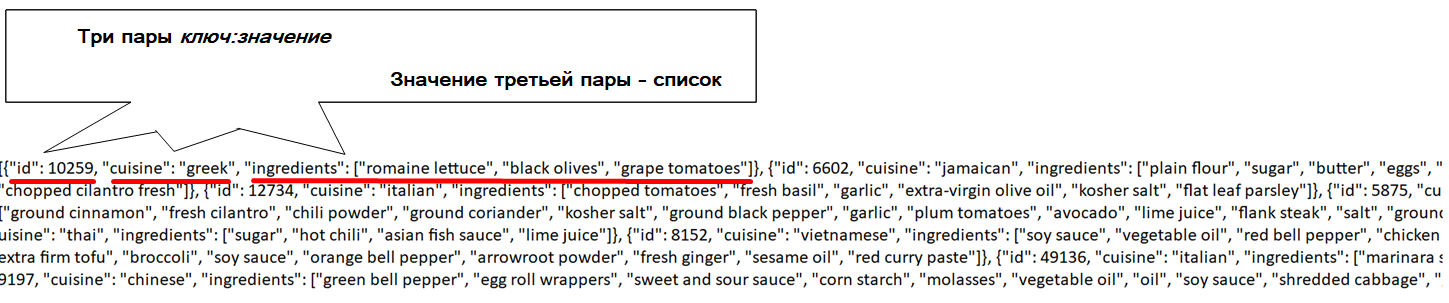

Формат JSON допускает неограниченное количество вложений этих структур друг в друга.

Давайте на примере посмотрим, что это означает. Все упражнения раздела мы будем выполнять на примере файла, содержащего информацию об ингредиентах блюд, относящихся к кухням разных народов.

# 5/13  5. JSON. Открываем JSON-файл и извлекаем данные

#### ОТКРЫВАЕМ JSON-ФАЙЛ

→ Чтобы перевести данные из формата `JSON` в формат, который можно обрабатывать инструментами `Python`, необходимо выполнить процедуру, которая называется десериализация (декодирование данных). Обратный процесс, связанный с переводом структур данных `Python` в формат `JSON`, называется сериализацией.

Для выполнения десериализации мы воспользуемся методом `load()` (от англ. загрузить) модуля `json`, который принимает на вход ссылку на открытый `JSON-файл`:

In [23]:
with open('data/recipes.json') as f: # Открываем файл и связываем его с объектом "f"
    recipes = json.load(f) # Загружаем содержимое открытого файла в переменную recipes

Отлично! Теперь содержимое нашего файла загружено в переменную `recipes`. Давайте выведем его на экран с помощью функции `pprint()` из одноимённого модуля:

✍️ Попробуйте выполнить этот код. Будьте готовы к тому, что данных в наборе много, поэтому в ячейке `Out` (если вы работаете с `Jupyter Notebook`) появится несколько сотен строк.

In [24]:
pprint(recipes) # Выводим на экран содержимое переменной recipes, используя функция pprint().

[{'cuisine': 'greek',
  'id': 10259,
  'ingredients': ['romaine lettuce',
                  'black olives',
                  'grape tomatoes',
                  'garlic',
                  'pepper',
                  'purple onion',
                  'seasoning',
                  'garbanzo beans',
                  'feta cheese crumbles']},
 {'cuisine': 'southern_us',
  'id': 25693,
  'ingredients': ['plain flour',
                  'ground pepper',
                  'salt',
                  'tomatoes',
                  'ground black pepper',
                  'thyme',
                  'eggs',
                  'green tomatoes',
                  'yellow corn meal',
                  'milk',
                  'vegetable oil']},
 {'cuisine': 'filipino',
  'id': 20130,
  'ingredients': ['eggs',
                  'pepper',
                  'salt',
                  'mayonaise',
                  'cooking oil',
                  'green chilies',
                  'grilled chicken bre

Итак, мы видим, что рецепт каждого из блюд описан в виде словаря, который состоит из трёх пар "ключ-значение":

* Ключ "`cuisine`" — обозначает принадлежность блюда к определённой национальной кухне (например, '`greek`', '`southern_us`', '`filipino`' и т. д.);  

* Ключ "`id`" — уникальный идентификационный номер блюда;  

* Ключ "`ingredients`"— содержит перечень продуктов, входящих в состав блюда.

Все рецепты (то есть все словари) хранятся в одном списке, располагаясь последовательно.

#### ИЗВЛЕКАЕМ ДАННЫЕ ИЗ JSON-ФАЙЛА

После того как мы провели десериализацию данных из JSON-файла, мы можем работать с полученным объектом как с обычными списками и словарями. Единственное отличие этой работы от манипуляций с привычными нам списками и словарями заключается в том, что данных теперь больше и они помещены внутрь структуры с большим количеством уровней вложенности.

Давайте выясним некоторые детали о блюде, которое записано первым в списке блюд. Его индекс — `0`, и информация о нём хранится в словаре. Чтобы узнать `ID` этого блюда, мы можем обратиться к соответствующему ключу словаря, выполнив следующий код:

In [25]:
recipes[0]['id']

10259

Здесь мы сначала извлекаем из списка первый элемент (индекс `0`). Поскольку каждый элемент списка является словарём, для получения нужной информации о конкретном блюде нам нужно указать ключ словаря. `ID` блюда доступно по ключу '`id`', и мы указываем этот ключ в отдельной паре квадратных скобок:

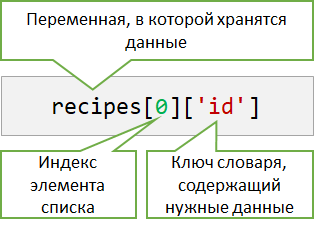

Аналогичным образом, для получения списка ингредиентов первого блюда в списке мы можем использовать тот же код, заменив в нём ключ '`id`' на '`ingredients`'. 

Задание 5.1

Сколько ингредиентов входят в состав первого блюда из предлагаемого списка?

In [28]:
len(recipes[0]['ingredients'])

9

Мы также можем извлечь информацию о конкретном блюде по его `ID`. Для этого необходимо с помощью цикла, например `for`, перебрать все элементы списка, проверяя ключ '`id`',  и извлечь нужную информацию, когда мы наконец найдем нужное блюдо.

Задание 5.2

К какой кухне относится блюдо с id = 13121?

In [29]:
for i in range(len(recipes)):
    if recipes[i]['id'] == 13121:
        print(recipes[i]['cuisine'])

thai


На практике также иногда возникают задачи по извлечению из JSON-файла обобщённой информации. Давайте попробуем решить две такие задачи.

Задание 5.3

Какое количество уникальных национальных кухонь присутствуют в нашем наборе данных?

ВАРИАНТ РЕШЕНИЯ С ИСПОЛЬЗОВАНИЕМ СПИСКА

Чтобы извлечь эту информацию, нам нужно создать пустой список и последовательно заполнять его уникальными значениями, доступными по ключу '`cuisine`' в каждом из словарей, содержащих информацию о рецептах. Поскольку словари объединены в список `recipes`, не получится применить известный нам метод `unique()` (этот метод неприменим к словарям), и для извлечения всех уникальных значений нужно перебирать элементы списка в цикле с параметром.

ВАРИАНТ РЕШЕНИЯ С ИСПОЛЬЗОВАНИЕМ МНОЖЕСТВА

Другой способ решения этой же задачи — использование для хранения данных о разных кухнях не списка, а множества (`set`). Множество содержит только уникальные элементы, поэтому при работе с ним нет необходимости проверять, содержится ли там тот или иной элемент. Если элемент (в нашем примере — название типа кухни) уже есть, то команда "добавить во множество такое же значение" будет проигнорирована компьютером.

In [30]:
cuisine_set = set()
for i in range(len(recipes)):
    cuisine_set.add(recipes[i]['cuisine'])
print(len(cuisine_set))

20


Задание 5.4

Какой из национальных кухонь принадлежит самое большое количество рецептов?

In [47]:
cuisine_dict = dict()
for i in range(len(recipes)):
    if recipes[i]['cuisine'] not in cuisine_dict.keys():
        cuisine_dict[recipes[i]['cuisine']] = 1
    else:
        cuisine_dict[recipes[i]['cuisine']] += 1
    
count_max = max(cuisine_dict.values())
print(list(cuisine_dict.keys())[list(cuisine_dict.values()).index(count_max)])
cuisine_dict

italian


{'greek': 15,
 'southern_us': 52,
 'filipino': 11,
 'indian': 41,
 'jamaican': 6,
 'spanish': 12,
 'italian': 101,
 'mexican': 79,
 'chinese': 39,
 'british': 9,
 'thai': 17,
 'vietnamese': 9,
 'cajun_creole': 16,
 'brazilian': 3,
 'french': 25,
 'japanese': 24,
 'irish': 9,
 'korean': 21,
 'moroccan': 9,
 'russian': 2}

# 6/13  6. JSON. Работаем с pandas. Из JSON в pandas

#### ИЗ JSON В PANDAS

→ Как вы помните, после десериализации наши данные были преобразованы в список, элементами которого являются вложенные словари, содержащие по три пары "ключ-значение". 